# "Yelp reviews" data set (https://bit.ly/2U7mLmC)

In [147]:
import pandas as pd
import numpy as np

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

!pip install gensim
import gensim
from sklearn.feature_extraction.text import CountVectorizer
!pip install pyldavis
import pyLDAvis
import pyLDAvis.gensim 
import matplotlib.pyplot as plt
%matplotlib inline


In [148]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

[nltk_data] Error loading stopwords: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Access Denied>
[nltk_data] Error loading punkt: <urlopen error Tunnel connection
[nltk_data]     failed: 407 Proxy Access Denied>
[nltk_data] Error loading vader_lexicon: <urlopen error Tunnel
[nltk_data]     connection failed: 407 Proxy Access Denied>


False

In [149]:
yelp = pd.read_csv('C:/Users/Administrator/UNSTRUCTURE DATA/datasets/yelp_labelled_1.csv', sep = '\t', header=None)

yelp.rename(columns={0:'reviews',1:'sentiment'}, inplace=True)

yelp.head()

,reviews,sentiment
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


# 1a. Text Cleaning Steps

-Convert every character to lower case.
-remove junk character.
-remove commonly used words.
-identify root of the words

In [150]:
docs = yelp['reviews'].str.lower().str.replace('[^a-z ]','') 
stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

#to remove the words from the reviews which are part of the stopwords.

docs_clean = []
for doc in docs.head(2):
    words = doc.split(" ")
    print(doc)
    print(words)
    words_clean = []
    for word in words:
        if word not in stopwords:
            words_clean.append(stemmer.stem(word)) #the words (we get in the list) after removal of the stop words.
    doc_clean=' '.join(words_clean)
    docs_clean.append(doc_clean)
    #print(words_clean)
    #print('-----------------------')
print(docs_clean)

wow loved this place
['wow', 'loved', 'this', 'place']
crust is not good
['crust', 'is', 'not', 'good']
['wow love place', 'crust good']


In [151]:

docs = yelp['reviews'].str.lower().str.replace('[^a-z ]','')
def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0                                       wow love place
1                                           crust good
2                                   tasti textur nasti
3    stop late may bank holiday rick steve recommen...
4                              select menu great price
Name: reviews, dtype: object

# 1 b. Document Term Matric

In [152]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
vectorizer.fit(docs_clean)
dtm = vectorizer.transform(docs_clean) 
dtm

<1000x1610 sparse matrix of type '<class 'numpy.int64'>'
	with 5510 stored elements in Compressed Sparse Row format>

1000 is the no. of documents.
1610 is the no. of columns ie the no. of unique terms.

1000*1610 =1610000 elements in the matrix . where 4246 element are non zero no.'s.



In [153]:
no_of_zeros= (1000*1610)-5510
sparsity = (no_of_zeros) / (1000*1610)*100
print(no_of_zeros)
print(sparsity)



1604490
99.65776397515528


In [154]:
df_dtm = pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())
(df_dtm ==0).sum().sum()   #to count the no. of values

df_dtm.sum().sort_values(ascending=False).head(20) #term wise frequency

food          125
place         112
good           95
servic         84
great          70
back           61
go             61
time           55
like           51
realli         36
love           33
best           30
disappoint     30
wait           29
order          28
ever           28
would          28
get            28
restaur        28
dont           28
dtype: int64

In [155]:
df_dtm.sum(axis=1).sort_values(ascending=False).head(20) #columsn wise frequency
 #row no.862 has the biggest review

862    18
715    17
236    17
157    16
623    16
100    15
533    15
884    15
123    15
28     15
132    15
849    14
42     14
395    14
189    14
961    14
610    14
805    14
792    13
394    13
dtype: int64

# 1c. Using Multinomial Naïve Bayes, create a supervised model to predict the sentiment and report accuracy.

In [157]:
from sklearn.model_selection import train_test_split
train_x,test_x = train_test_split(df_dtm,
                                 test_size=0.2,
                                 random_state=100)

train_y = yelp.iloc[train_x.index]['sentiment'] 
test_y =yelp.iloc[test_x.index]['sentiment']

In [158]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostClassifier

In [159]:
mulNB_model = MultinomialNB()
mulNB_model.fit(train_x,train_y)
mulNB_predict_class = mulNB_model.predict(test_x)
accuracy_score(test_y,mulNB_predict_class)

0.765

# d. Using Random Forest to create a supervised model to predict the sentiment and report 

In [160]:

rf_model = RandomForestClassifier(random_state=100, n_estimators=300)
rf_model.fit(train_x,train_y)
rf_predict_class = rf_model.predict(test_x)
accuracy_score(test_y,rf_predict_class)

0.775

# d. Using Adaboost to create a supervised model to predict the sentiment and report

In [161]:
adaboost_model = AdaBoostClassifier(n_estimators=300,
                         random_state=100,learning_rate=1)
adaboost_model.fit(train_x,train_y)
adaboost_predict_class = rf_model.predict(test_x)
accuracy_score(test_y,adaboost_predict_class)

0.775

# e.Using Google’s word2vec, classify the sentiment. Build a Adaboost model and report accuracy along with ROC curves (comparing results from above models)

link = ['Kaggle/word2vec'](https://www.kaggle.com/oendric/yelp-sentiment-word2vec?scriptVersionId=11353483)

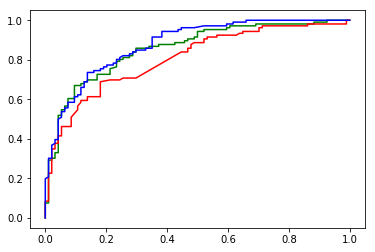

In [169]:
from sklearn.metrics import roc_curve


### ROC for Naive Bayes

prob_nb = pd.DataFrame(mulNB_model.predict_proba(test_x),

                    columns=['Neg_0', 'Pos_1'])

fpr, tpr, cutoffs = roc_curve(test_y, prob_nb['Pos_1'], pos_label=1)

plt.plot(fpr,tpr, color='green')

 

### ROC for Adaboost

prob_ada = pd.DataFrame(adaboost_model.predict_proba(test_x),

                    columns=['Neg_0', 'Pos_1'])

fpr, tpr, cutoffs = roc_curve(test_y, prob_ada['Pos_1'], pos_label=1)

plt.plot(fpr,tpr, color='red')

 

### ROC for RandomForest

prob_rf = pd.DataFrame(rf_model.predict_proba(test_x),

                    columns=['Neg_0', 'Pos_1'])

fpr, tpr, cutoffs = roc_curve(test_y, prob_rf['Pos_1'], pos_label=1)

plt.plot(fpr,tpr, color='blue')

# f. Identify sentiment using vader package and compare the results

In [165]:
sentiment = SentimentIntensityAnalyzer()
def get_sentiment(text):
    sentiment =SentimentIntensityAnalyzer()
    compound = sentiment.polarity_scores(text)['compound']
    if compound > 0:
        return 1
    else:
        return 0
yelp['sentiment_vader'] = yelp['reviews'].apply(get_sentiment)

In [171]:
from sklearn.metrics import accuracy_score
accuracy_score(yelp['sentiment'],yelp['sentiment_vader'])

0.812

using vader package gives higher accuracy of 81.2 than using supervised algorithms (random forest, adaboost and multinominal gaussian algorithms)

# 2. Apply topic modelling to understand the topics discussed in the reviews. Using multiple iterations, choose appropriate number of topics. Visualize number of documents under each cluster using a bar chart

In [173]:
docs_clean = []

docs = yelp['reviews'].fillna('').str.lower().str.replace('[^a-z ]','')

stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(['','food','cocktails','customer','best','dessert'])
stemmer = nltk.stem.PorterStemmer()

 

for doc in docs:

    words = doc.split(' ')

    words_clean = [stemmer.stem(word) for word in words if stemmer.stem(word) not in stopwords]

    docs_clean.append(words_clean)

len(docs_clean)

1000

In [177]:
dictionary = gensim.corpora.Dictionary(docs_clean) #this gives each term an id 
dictionary.doc2bow(docs_clean[0]) #to get bag of words of each row containing each document

[(0, 1), (1, 1), (2, 1), (3, 1)]

In [178]:
docs_bow = []

for doc in docs_clean:

    doc_bow = dictionary.doc2bow(doc)

    docs_bow.append(doc_bow)

In [180]:
lda_model = gensim.models.LdaModel(docs_bow,
                                  id2word=dictionary,
                                  num_topics=4)
lda_model.get_document_topics(docs_bow[0])

lda_model.print_topics()

[(0,
  '0.074*"wa" + 0.019*"place" + 0.019*"thi" + 0.011*"servic" + 0.009*"veri" + 0.009*"great" + 0.008*"good" + 0.007*"realli" + 0.006*"price" + 0.006*"love"'),
 (1,
  '0.025*"wa" + 0.017*"great" + 0.014*"servic" + 0.013*"back" + 0.013*"time" + 0.010*"veri" + 0.008*"order" + 0.008*"dont" + 0.007*"chicken" + 0.006*"ever"'),
 (2,
  '0.039*"thi" + 0.027*"wa" + 0.022*"place" + 0.014*"servic" + 0.014*"like" + 0.012*"veri" + 0.009*"go" + 0.007*"also" + 0.007*"back" + 0.007*"would"'),
 (3,
  '0.031*"good" + 0.028*"wa" + 0.016*"go" + 0.014*"place" + 0.011*"time" + 0.010*"thi" + 0.009*"back" + 0.008*"veri" + 0.008*"realli" + 0.008*"great"')]

In [181]:
doc2topic_prob = lda_model.get_document_topics(docs_bow[0])
doc2topic_prob = pd.DataFrame(doc2topic_prob, columns=['topic','prob'])
doc2topic_prob.sort_values('prob', ascending=False).iloc[0]['topic']


0.0

In [182]:
topics=[]

for doc_bow in docs_bow:
    doc2topic_prob = lda_model.get_document_topics(doc_bow)
    doc2topic_prob = pd.DataFrame(doc2topic_prob,
                                 columns = ['topic','prob'])
    topic = doc2topic_prob.sort_values('prob',
                                      ascending=False).iloc[0]['topic']
    topics.append(topic)

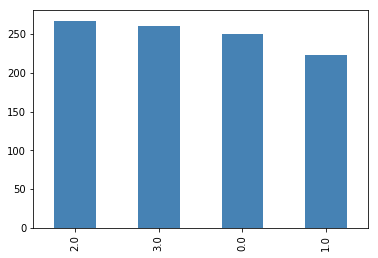

In [184]:
%matplotlib inline

yelp['topics']=topics
yelp['topics'].value_counts().plot.bar(color='steelblue')